In [15]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

from preprocessing.scripts import split_movie_script
from testing.vader import model as vadar
from movie_sentiment_plot import movie_sentiment_plot

In [16]:
movie_list = os.listdir('./raw_data/screenplay_data/data/raw_texts/raw_texts')

In [17]:
#moving average
def moving_average(data, window_size):
    weights = np.repeat(1.0, window_size) / window_size
    moving_avg = np.convolve(data, weights, 'valid')
    return moving_avg

In [18]:
# Given the parameters for each movie title, calculates the text chunk scores
def movie_raw_score(movie_title, typer, pad, rm_stopwords, group_chunk):
    
    movie_script_splitted = split_movie_script(movie_title, typer=typer, \
                                               pad=pad, lower=False, rm_stopwords=rm_stopwords)
    
    movie_script_scored = vadar(movie_script_splitted, group_chunk)
    
    return movie_script_scored

In [19]:
#Given a movie name and a list of parameters, plot different movie arcs

def arc_grid_search(movie_title):
    # plots the arc with different values for: sentence, pad, window_size for moving average

    rm_stopwords_list = [False, True]
    
    rows = len(rm_stopwords_list)
    fig, axs = plt.subplots(rows*2,2, figsize=(15, 30))
    
    # words - 50,10,10
    for i in range(len(rm_stopwords_list)):
        rm_stopwords = rm_stopwords_list[i]
        raw_score = movie_raw_score(movie_title, typer='words', pad=50, rm_stopwords=rm_stopwords, group_chunk=10)
        moving_avg = moving_average(raw_score['compound'], 10)
        print(f'step {i+1} - words - 50,10,10')
        axs[0,i].plot(moving_avg)
        axs[0,i].set_title(f'words, p={50}, ws= {10}, g={10},st={rm_stopwords}', fontsize=8)

    # words - 50,50,10
    for i in range(len(rm_stopwords_list)):
        rm_stopwords = rm_stopwords_list[i]
        raw_score = movie_raw_score(movie_title, typer='words', pad=50, rm_stopwords=rm_stopwords,
                                    group_chunk=10)
        moving_avg = moving_average(raw_score['compound'], 50)
        print(f'step {i+1} - words - 50,50,10')
        axs[1,i].plot(moving_avg)
        axs[1,i].set_title(f'words, p={50}, ws= {50},g={10},st={rm_stopwords}', fontsize=8)    

    # words - 50,50,1
    for i in range(len(rm_stopwords_list)):
        rm_stopwords = rm_stopwords_list[i]
        raw_score = movie_raw_score(movie_title, typer='words', pad=50, rm_stopwords=rm_stopwords,
                                    group_chunk=1)
        moving_avg = moving_average(raw_score['compound'], 50)
        print(f'step {i+1} - words - 50,50,1')
        axs[2,i].plot(moving_avg)
        axs[2,i].set_title(f'words, p={50}, ws= {50},g={1},st={rm_stopwords}', fontsize=8)     

    # sentence - 50,50,10
    for i in range(len(rm_stopwords_list)):
        rm_stopwords = rm_stopwords_list[i]
        raw_score = movie_raw_score(movie_title, typer='sentence', pad=50, rm_stopwords=rm_stopwords,
                                    group_chunk=10)
        moving_avg = moving_average(raw_score['compound'], 50)
        print(f'step {i+1} - sentence - 50,50,10')
        axs[3,i].plot(moving_avg)
        axs[3,i].set_title(f'sentence, p={50}, ws= {50},g={10},st={rm_stopwords}', fontsize=8)   
    

step 1 - words - 50,10,10
step 2 - words - 50,10,10
step 1 - words - 50,50,10
step 2 - words - 50,50,10
step 1 - words - 50,50,1
step 2 - words - 50,50,1
step 1 - sentence - 50,50,10
step 2 - sentence - 50,50,10


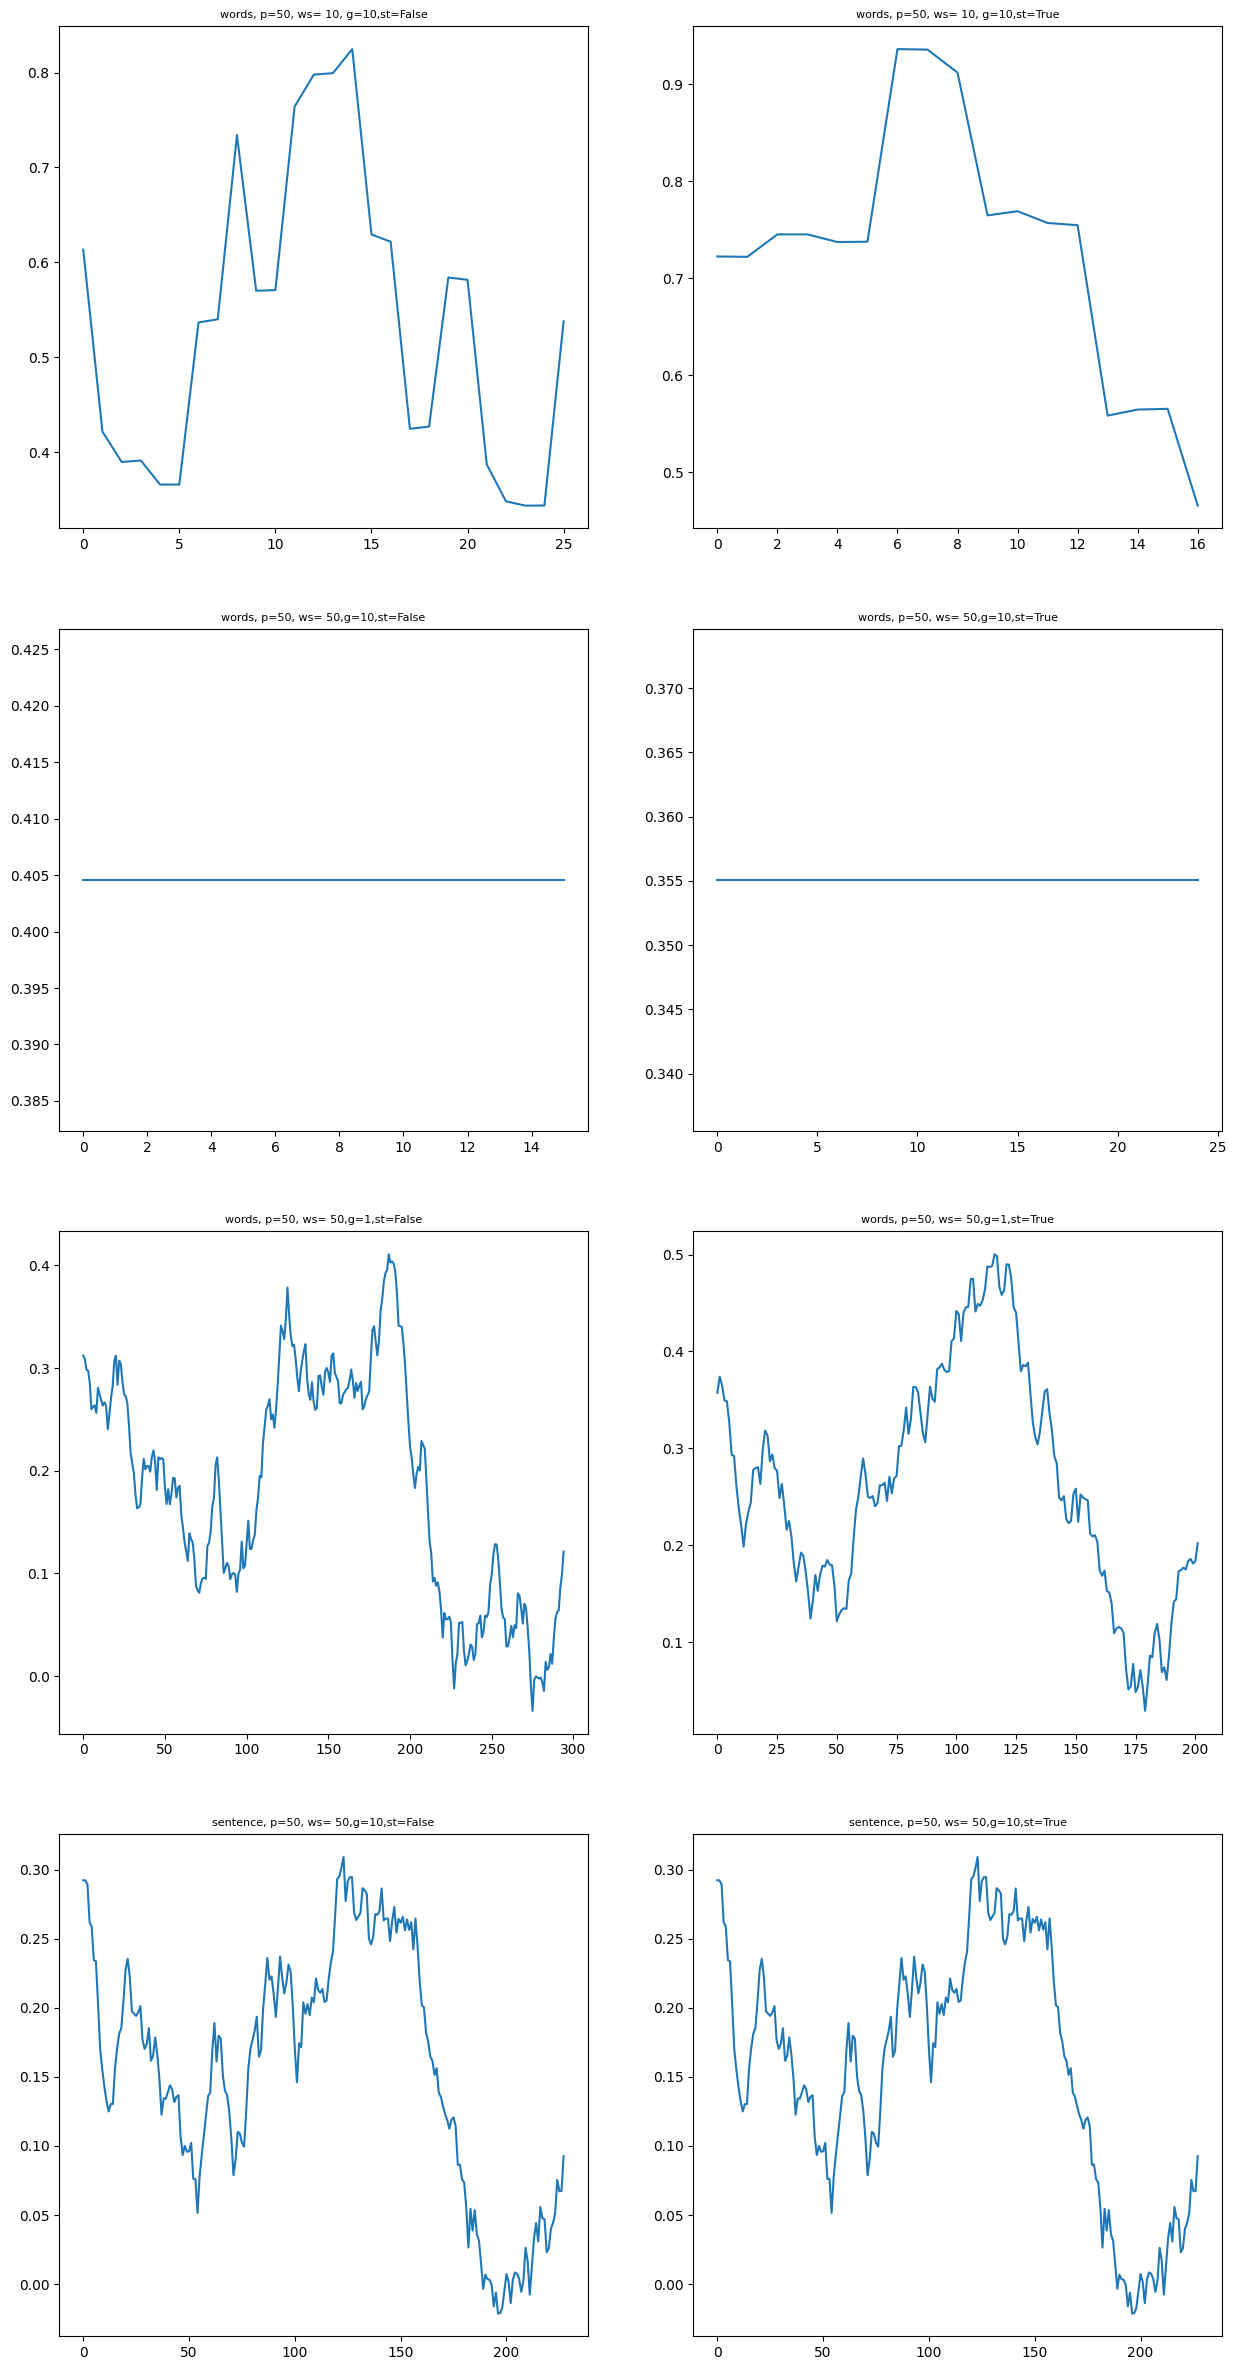

In [20]:
arc_grid_search('Up_1049413.txt')

step 1 - words - 50,10,10
step 2 - words - 50,10,10
step 1 - words - 50,50,10
step 2 - words - 50,50,10
step 1 - words - 50,50,1
step 2 - words - 50,50,1
step 1 - sentence - 50,50,10
step 2 - sentence - 50,50,10


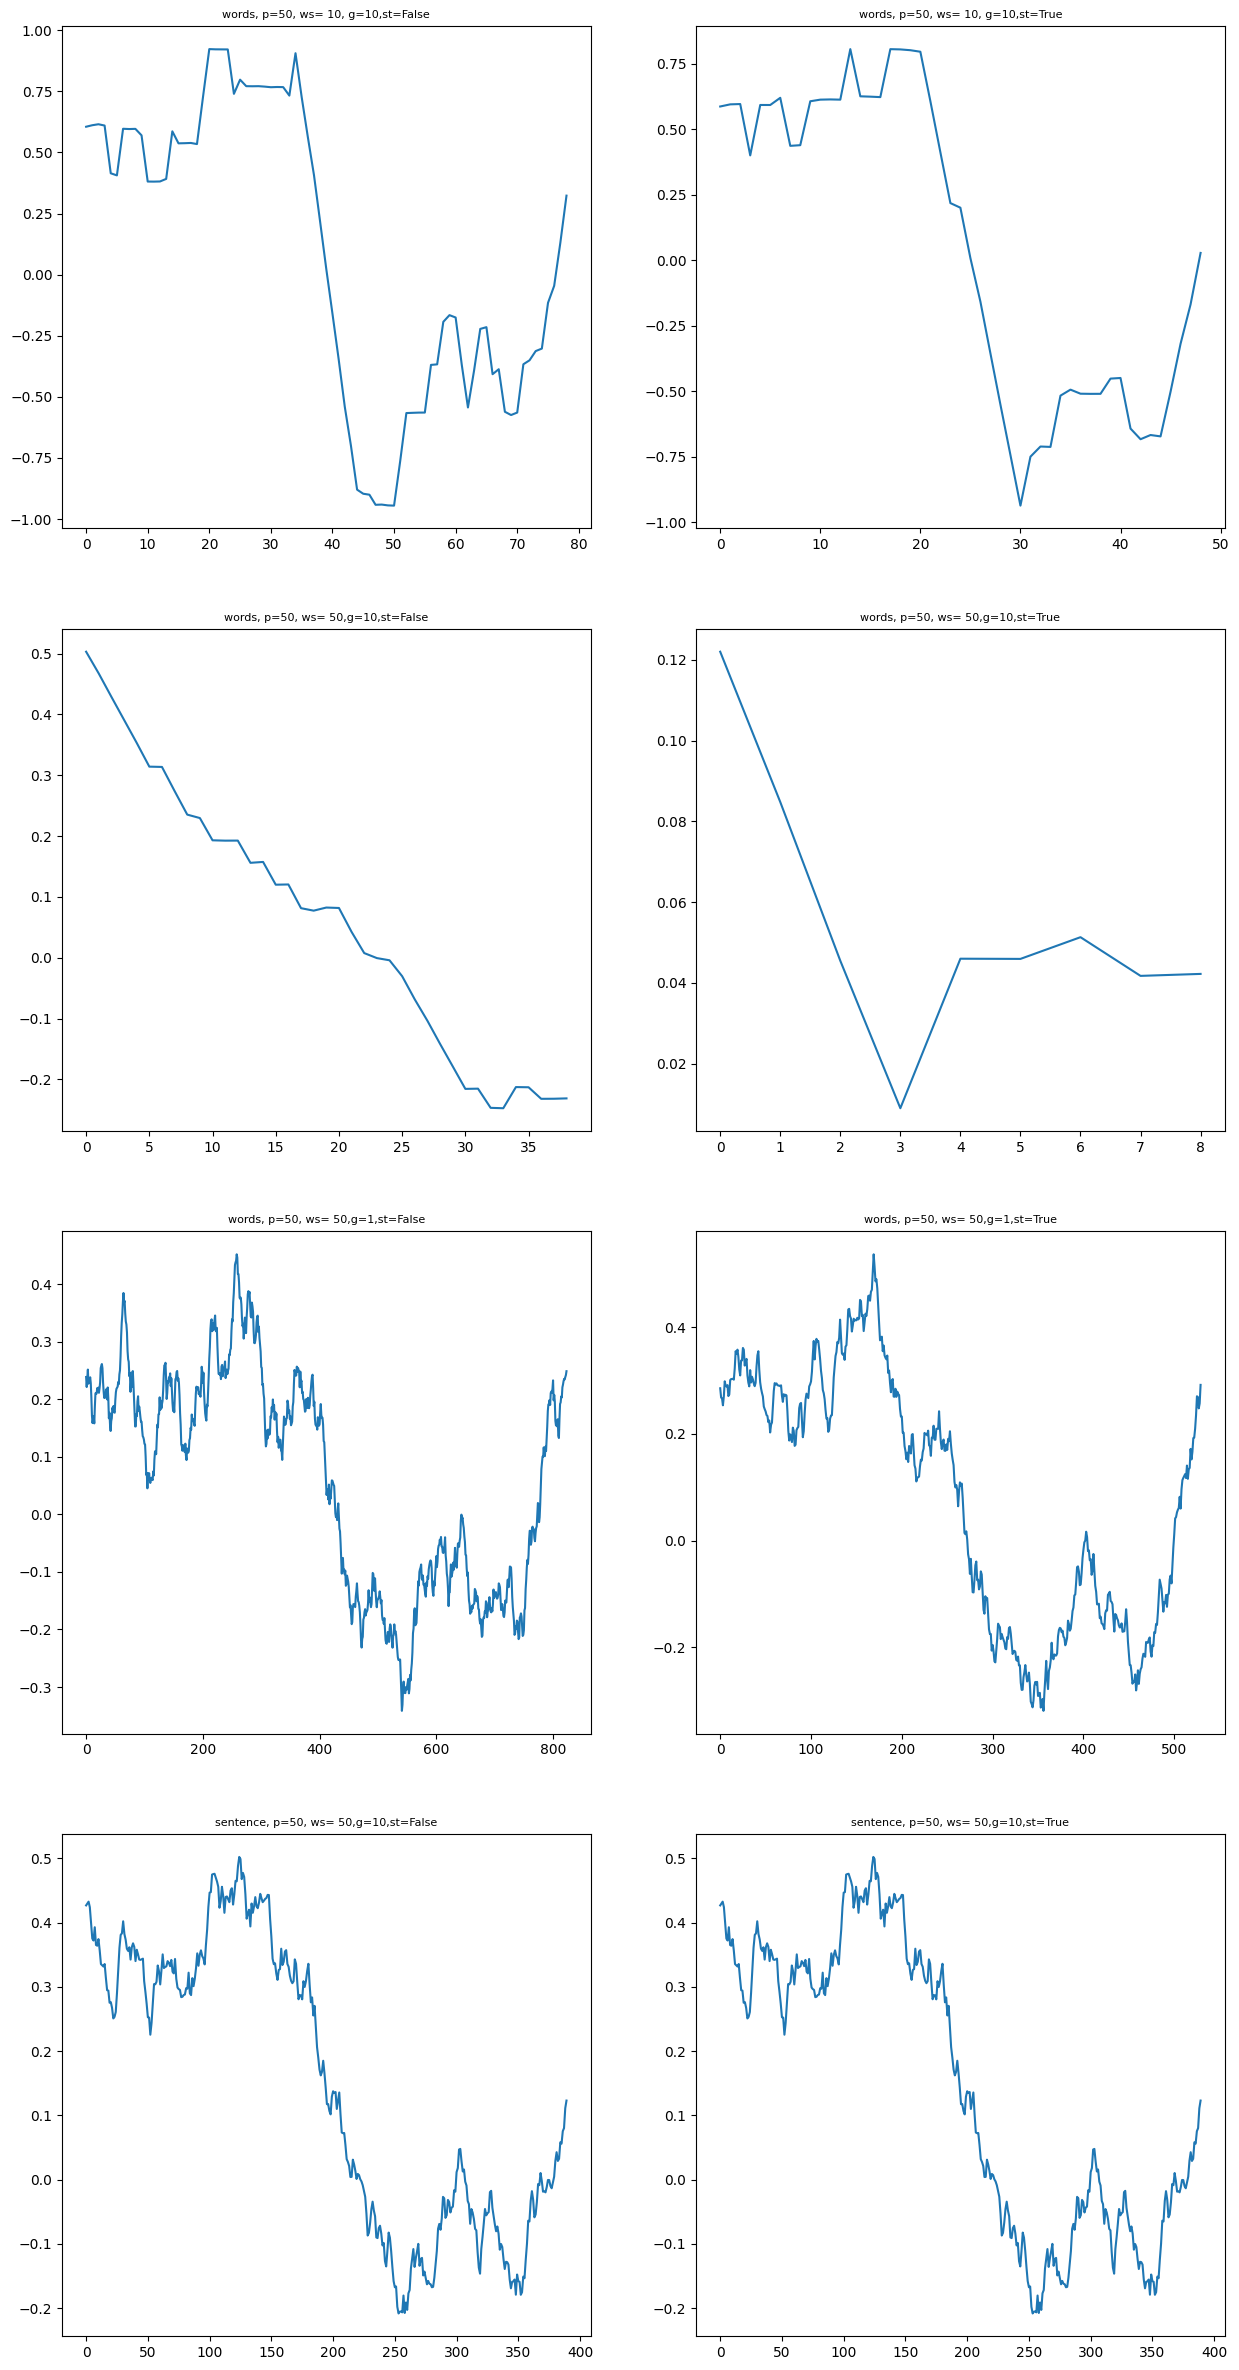

In [21]:
arc_grid_search('Titanic_0120338.txt')

step 1 - words - 50,10,10
step 2 - words - 50,10,10
step 1 - words - 50,50,10
step 2 - words - 50,50,10
step 1 - words - 50,50,1
step 2 - words - 50,50,1
step 1 - sentence - 50,50,10
step 2 - sentence - 50,50,10


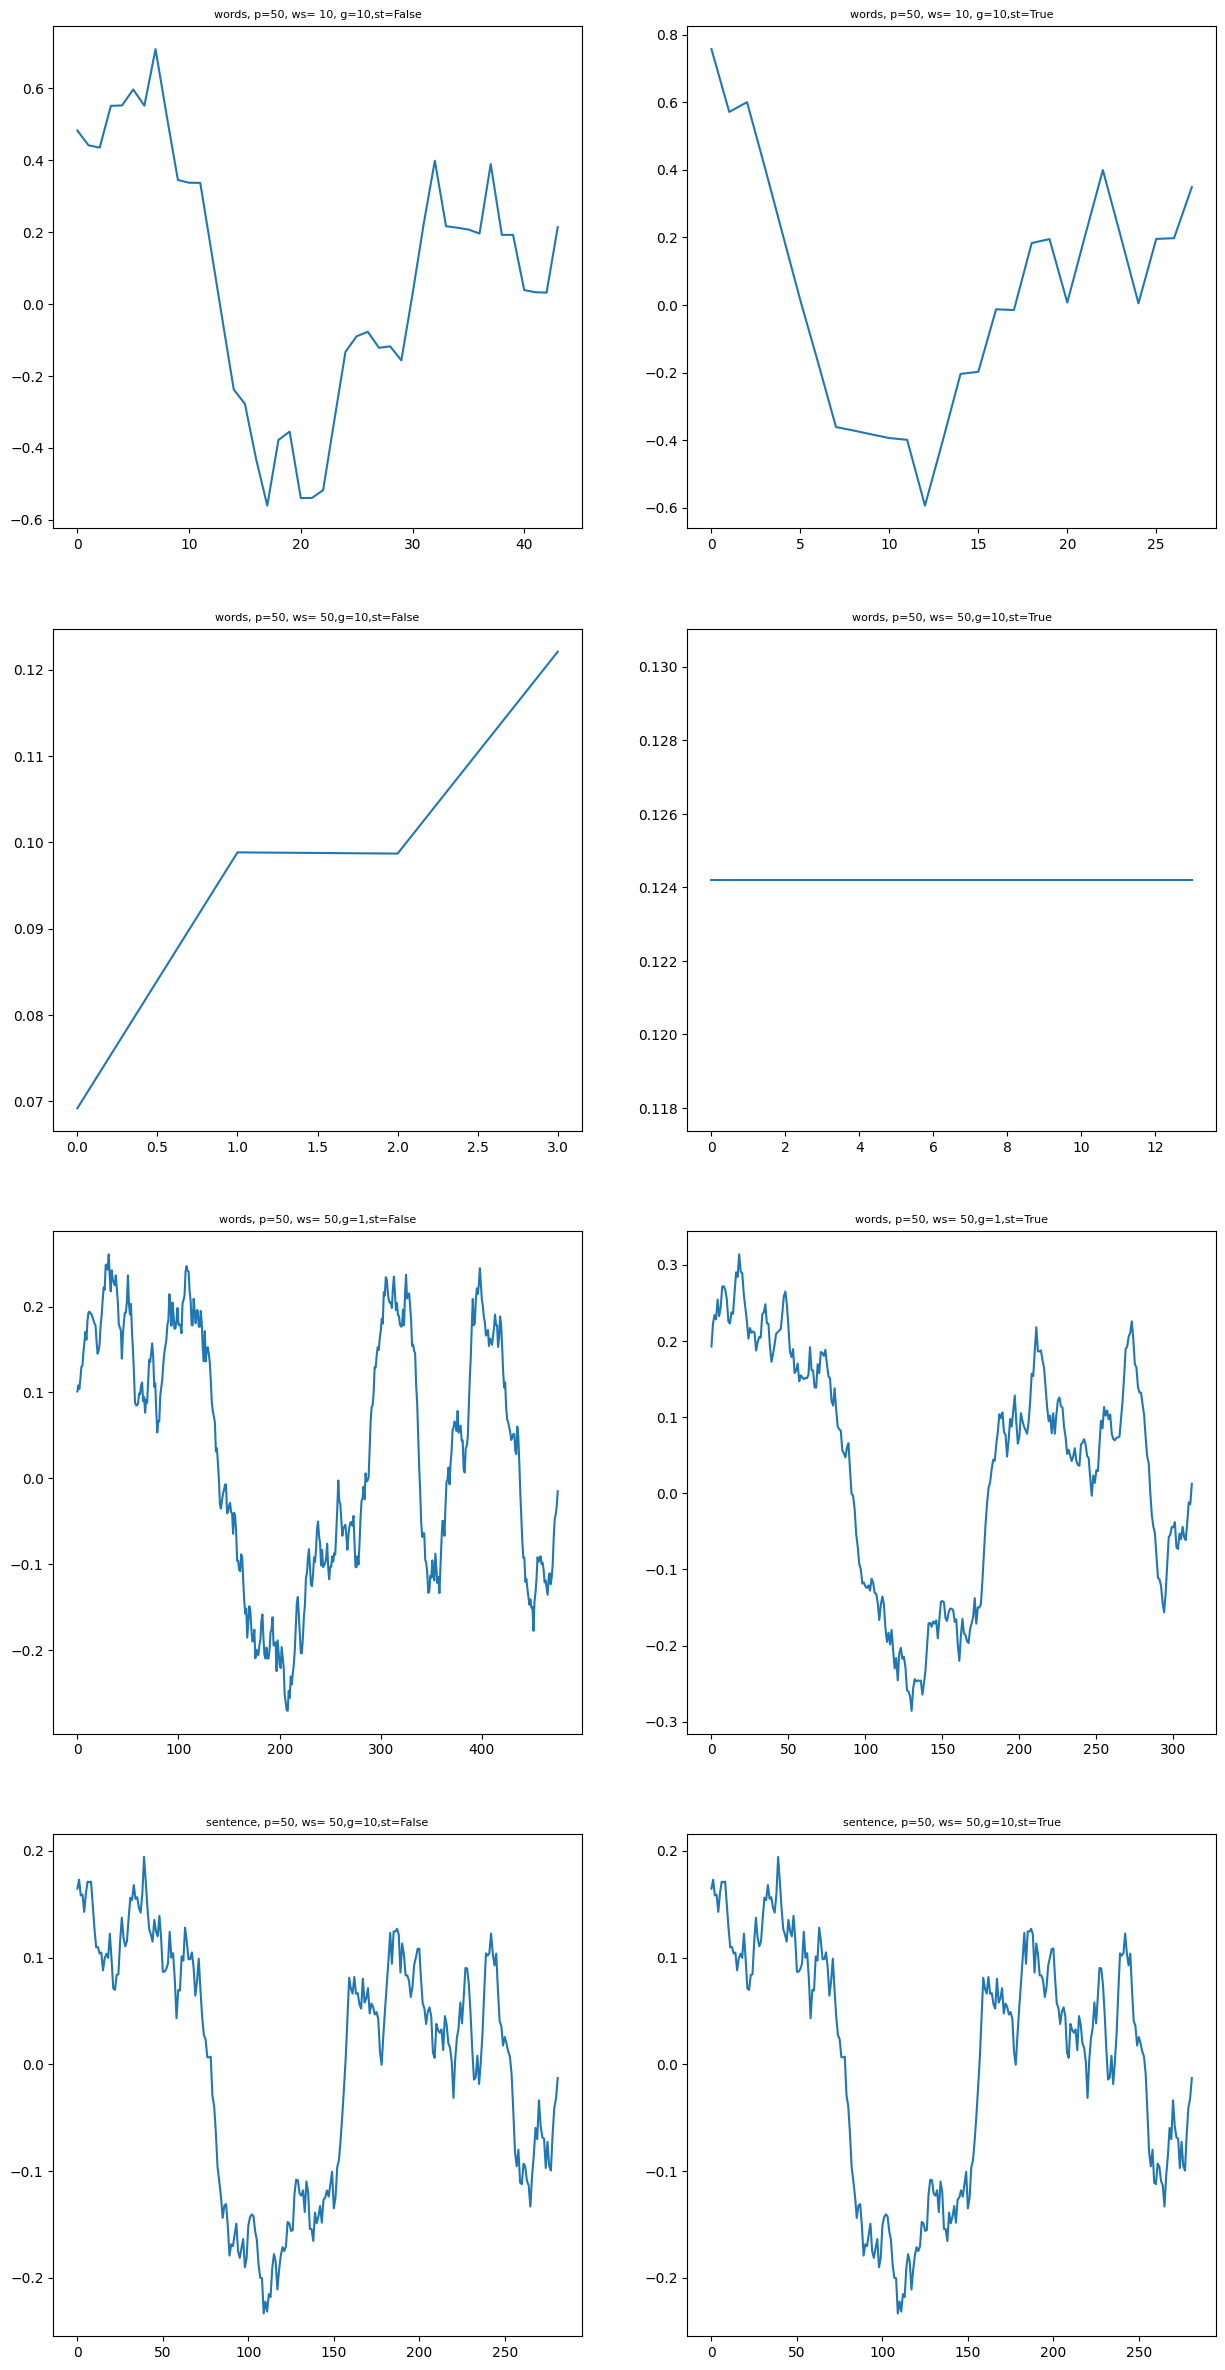

In [22]:
arc_grid_search('V for Vendetta_0434409.txt')

step 1 - words - 50,10,10
step 2 - words - 50,10,10
step 1 - words - 50,50,10
step 2 - words - 50,50,10
step 1 - words - 50,50,1
step 2 - words - 50,50,1
step 1 - sentence - 50,50,10
step 2 - sentence - 50,50,10


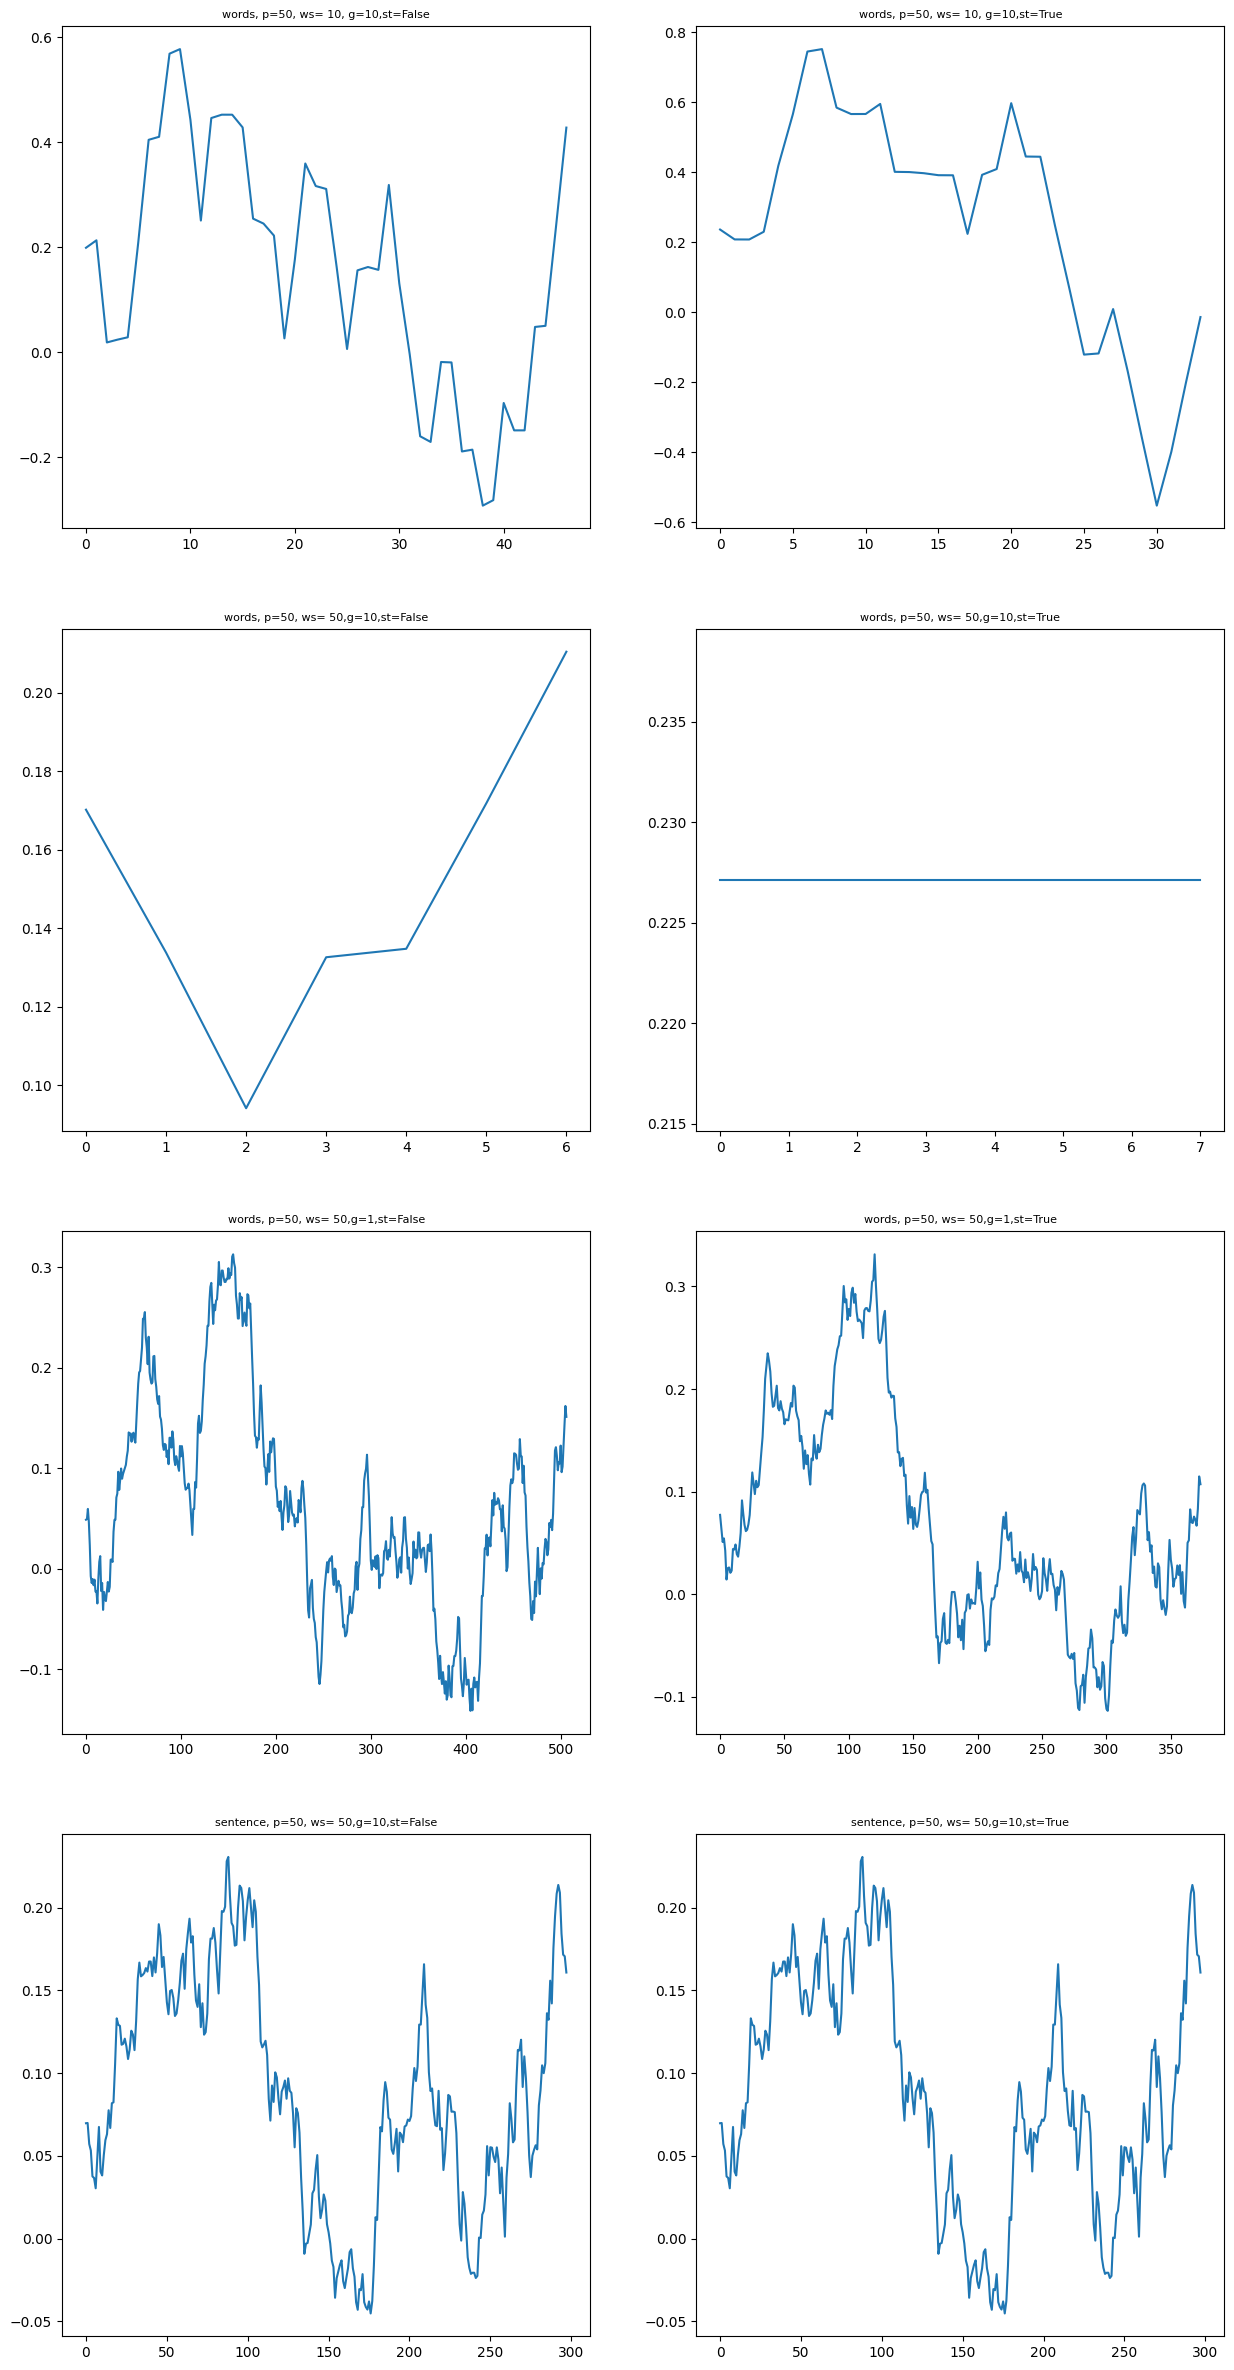

In [23]:
arc_grid_search('Harry Potter and the Sorcerer s Stone_0241527.txt')

step 1 - words - 50,10,10
step 2 - words - 50,10,10
step 1 - words - 50,50,10
step 2 - words - 50,50,10
step 1 - words - 50,50,1
step 2 - words - 50,50,1
step 1 - sentence - 50,50,10
step 2 - sentence - 50,50,10


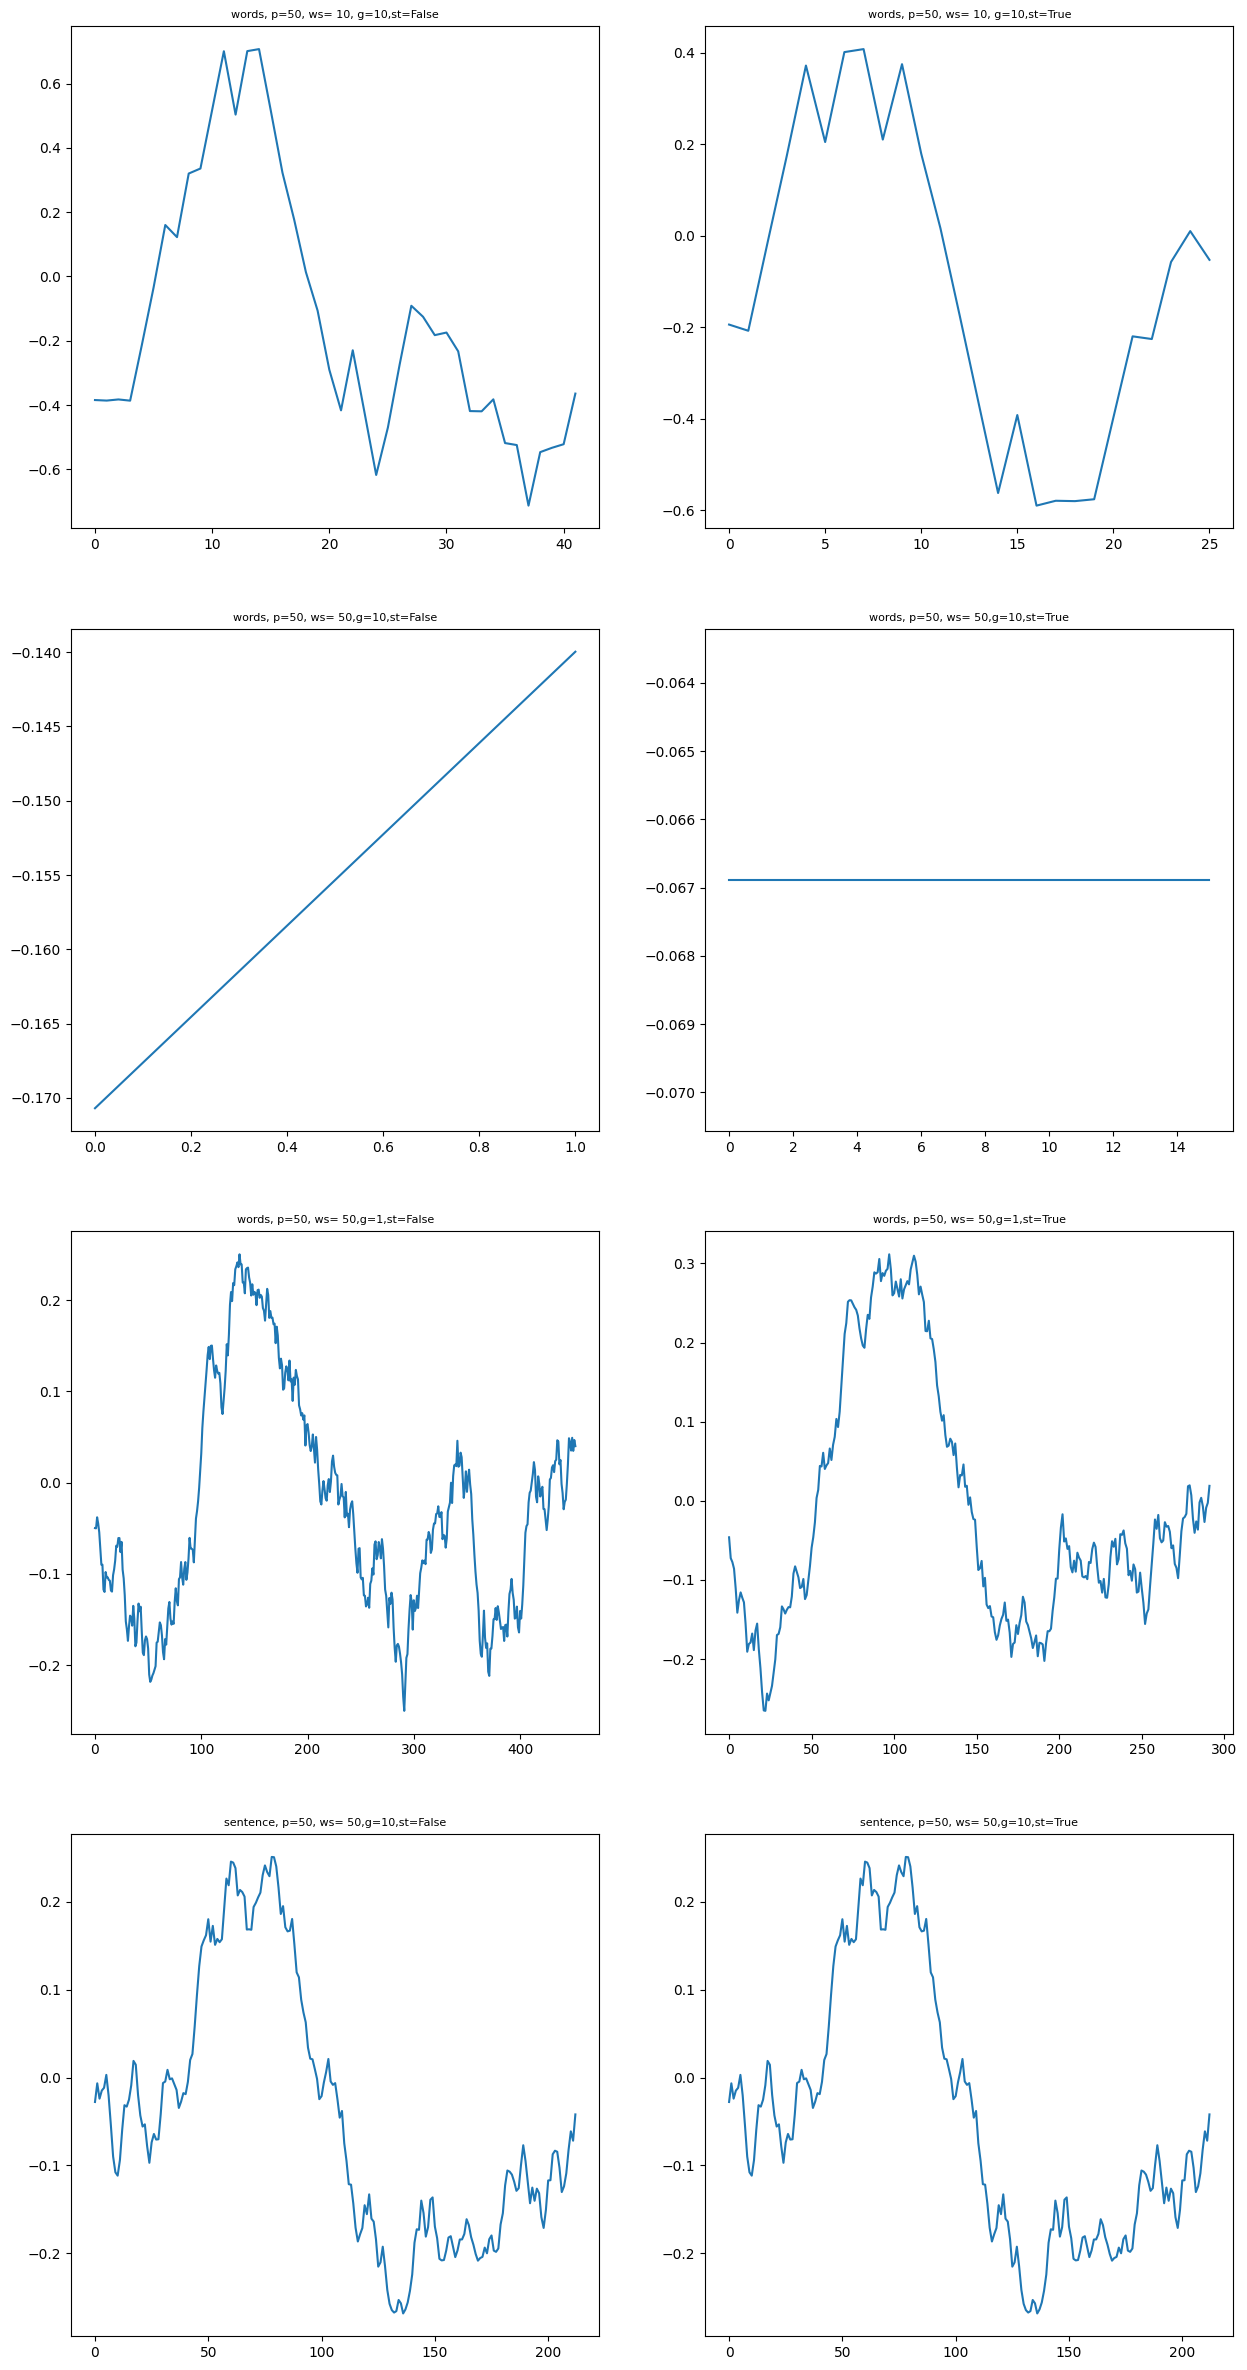

In [24]:
arc_grid_search('Men in Black_0119654.txt')

step 1 - words - 50,10,10
step 2 - words - 50,10,10
step 1 - words - 50,50,10
step 2 - words - 50,50,10
step 1 - words - 50,50,1
step 2 - words - 50,50,1
step 1 - sentence - 50,50,10
step 2 - sentence - 50,50,10


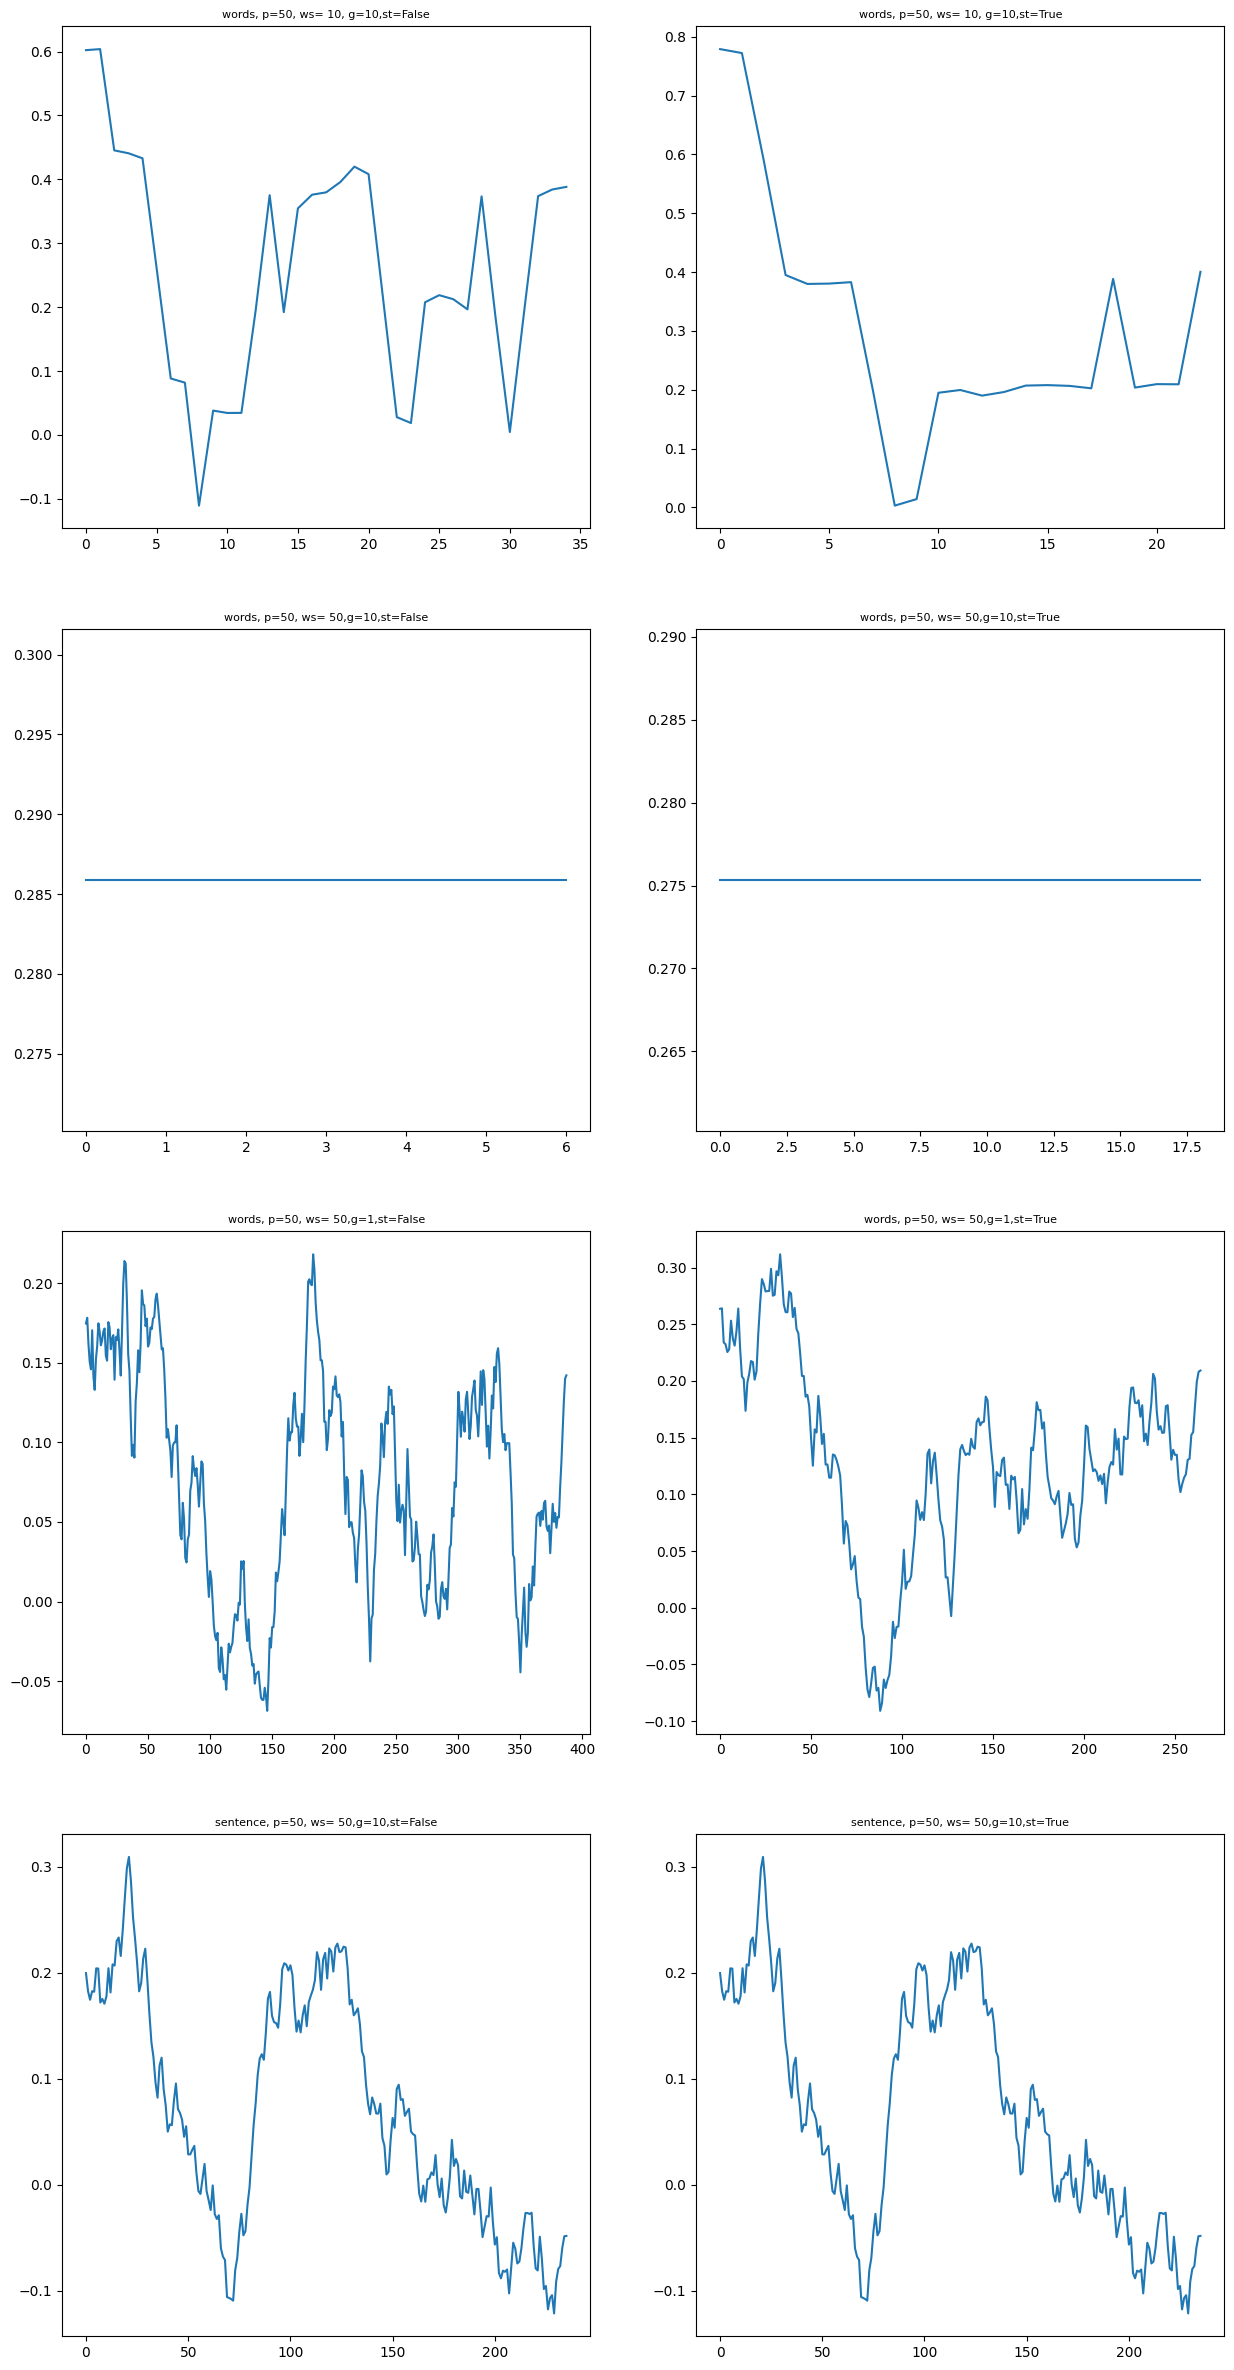

In [25]:
arc_grid_search('Toy Story_0114709.txt')

step 1 - words - 50,10,10
step 2 - words - 50,10,10
step 1 - words - 50,50,10
step 2 - words - 50,50,10
step 1 - words - 50,50,1
step 2 - words - 50,50,1
step 1 - sentence - 50,50,10
step 2 - sentence - 50,50,10


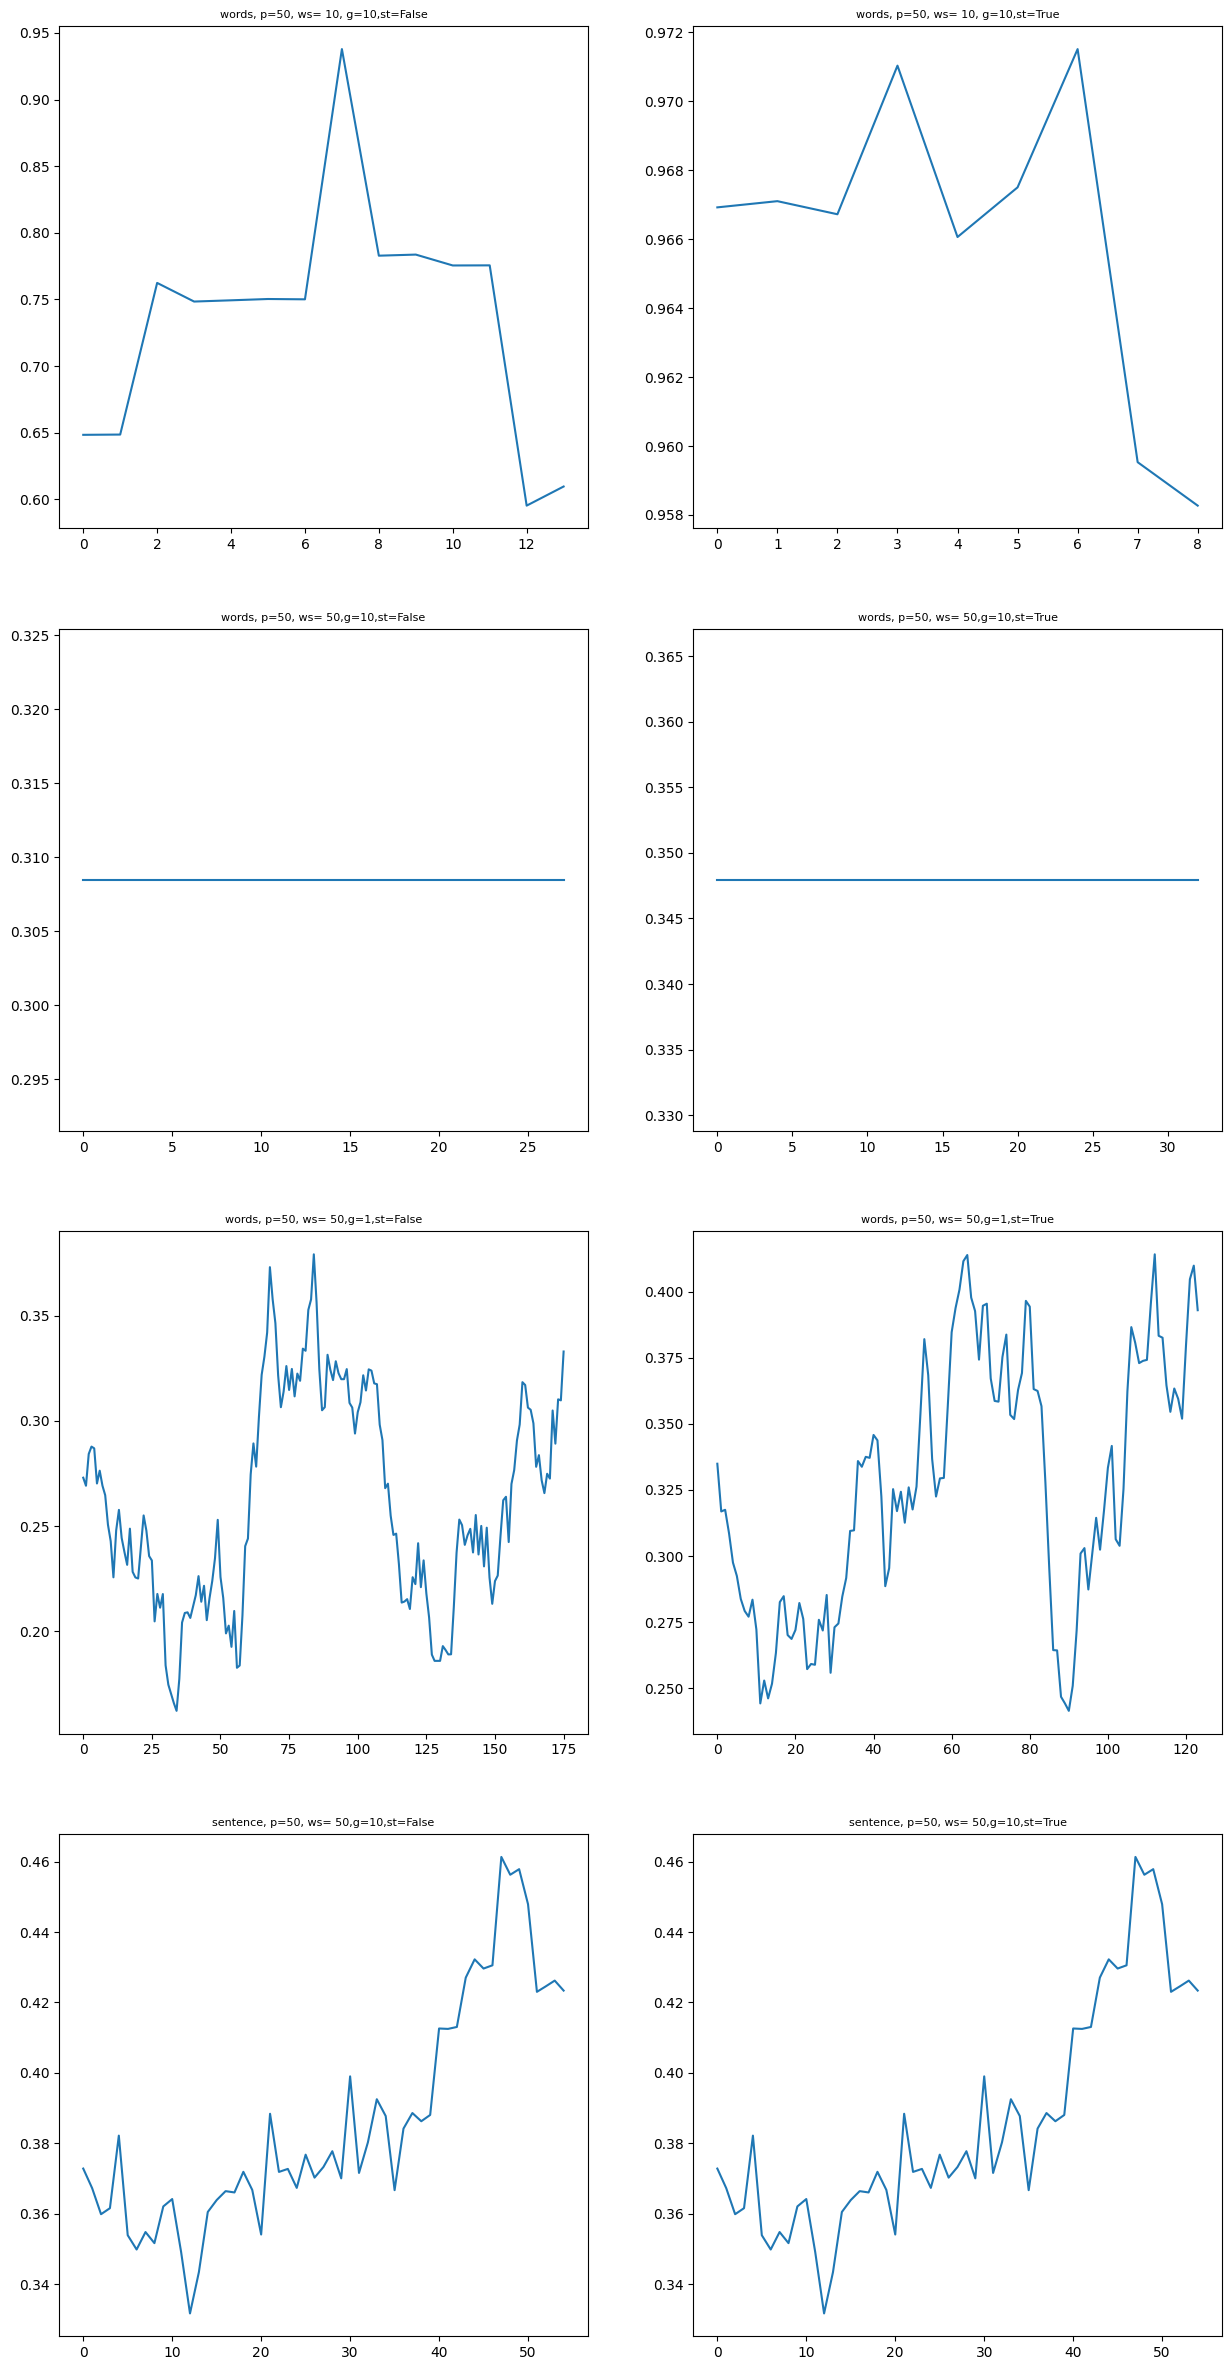

In [26]:
arc_grid_search('Hairspray_0427327.txt')

step 1 - words - 50,10,10
step 2 - words - 50,10,10
step 1 - words - 50,50,10
step 2 - words - 50,50,10
step 1 - words - 50,50,1
step 2 - words - 50,50,1
step 1 - sentence - 50,50,10
step 2 - sentence - 50,50,10


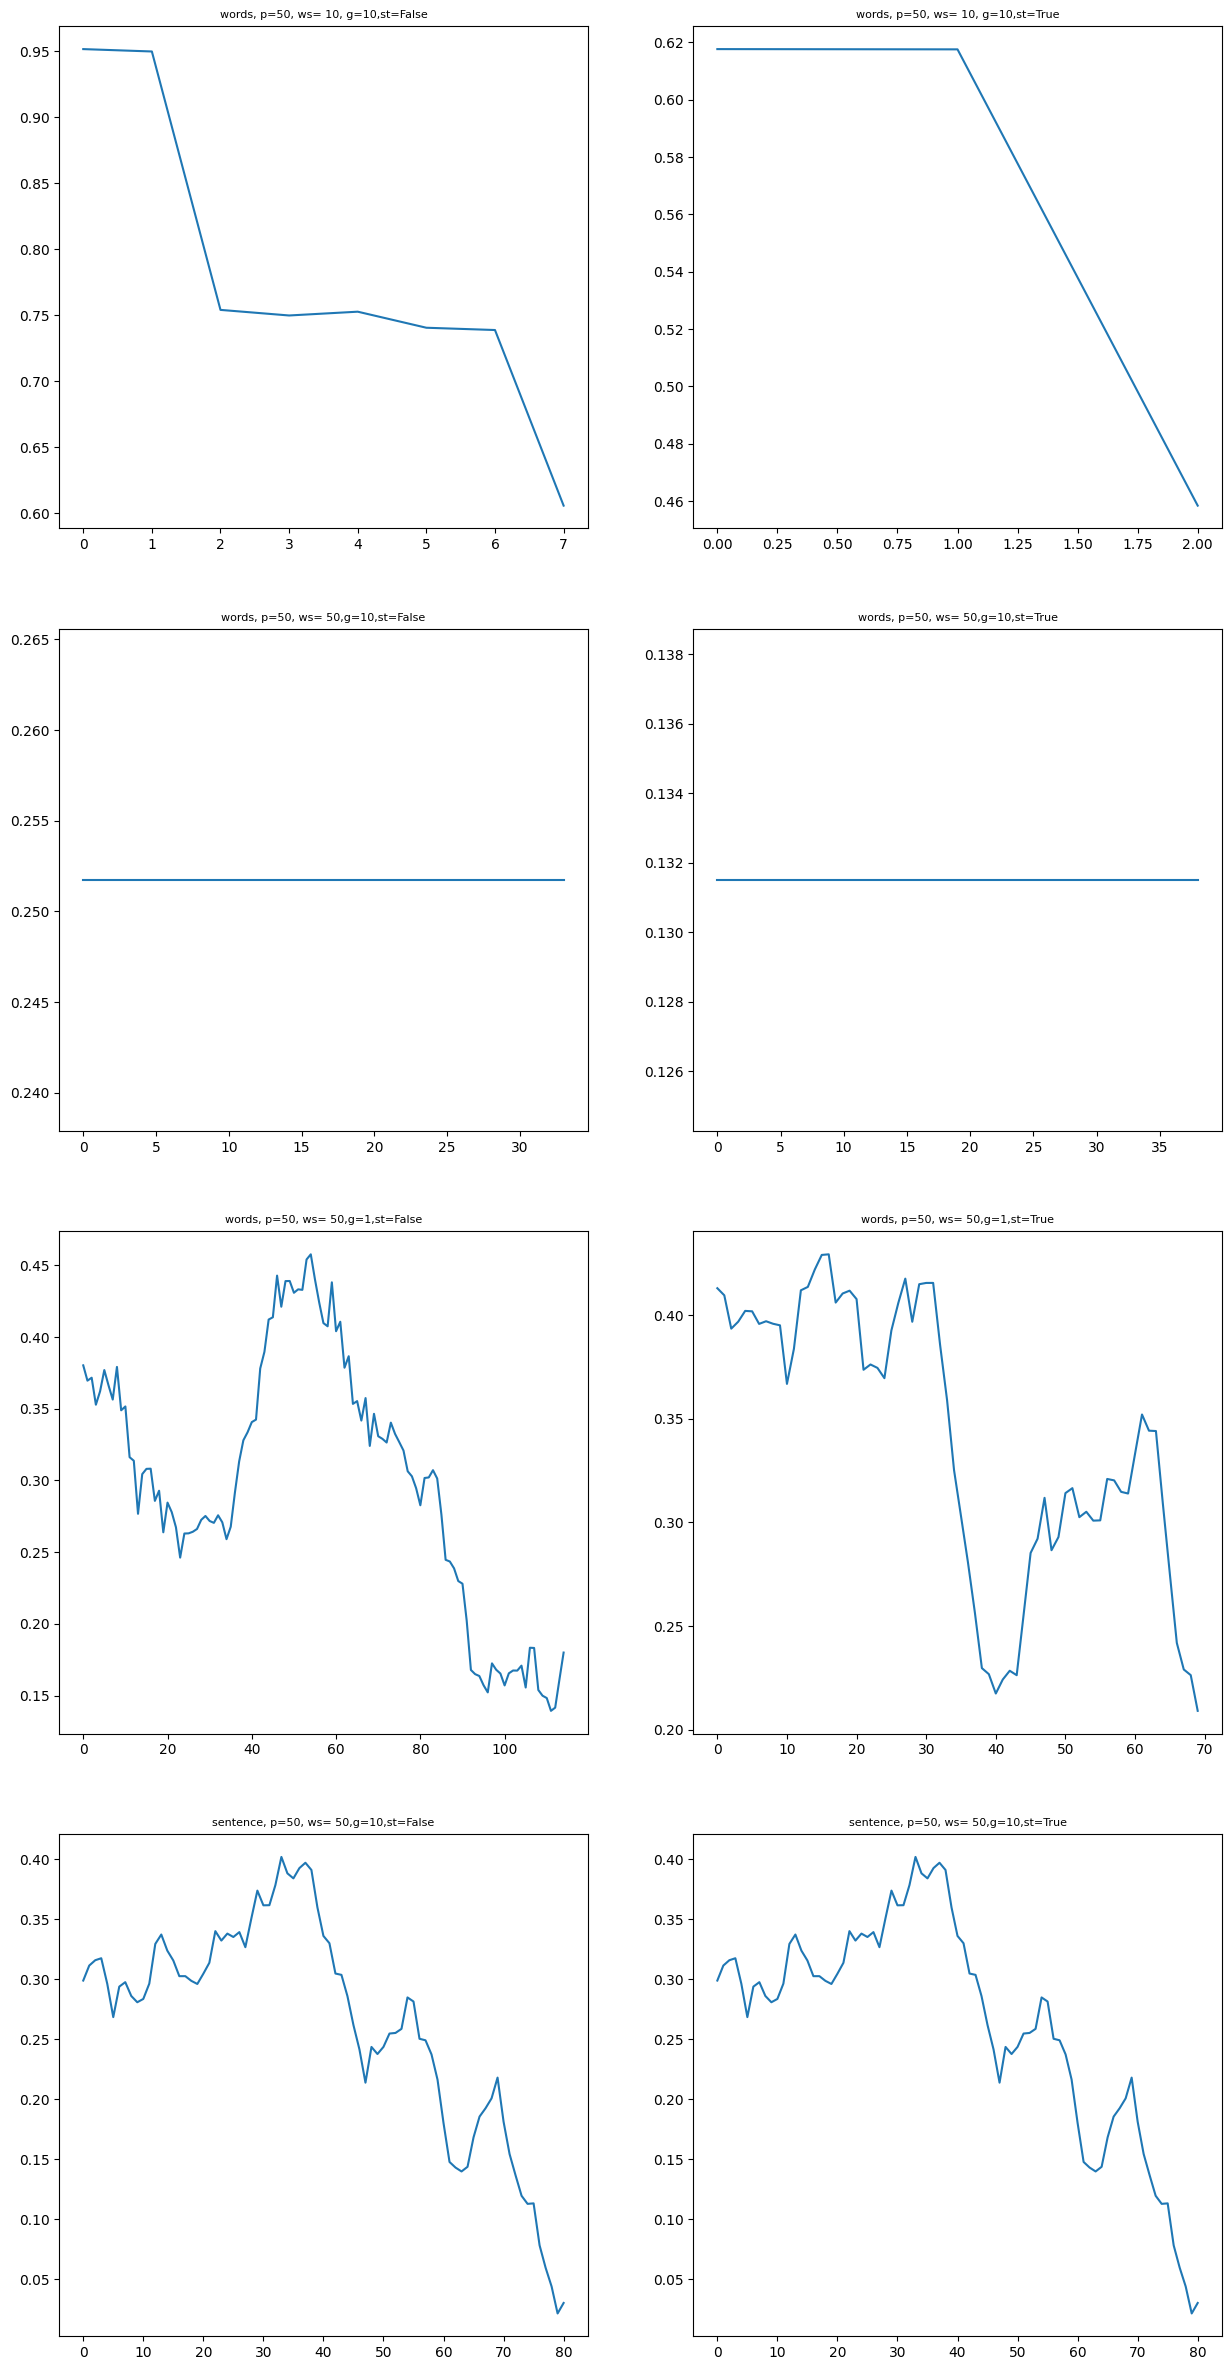

In [27]:
arc_grid_search('Edward Scissorhands_0099487.txt')

step 1 - words - 50,10,10
step 2 - words - 50,10,10
step 1 - words - 50,50,10
step 2 - words - 50,50,10
step 1 - words - 50,50,1
step 2 - words - 50,50,1
step 1 - sentence - 50,50,10
step 2 - sentence - 50,50,10


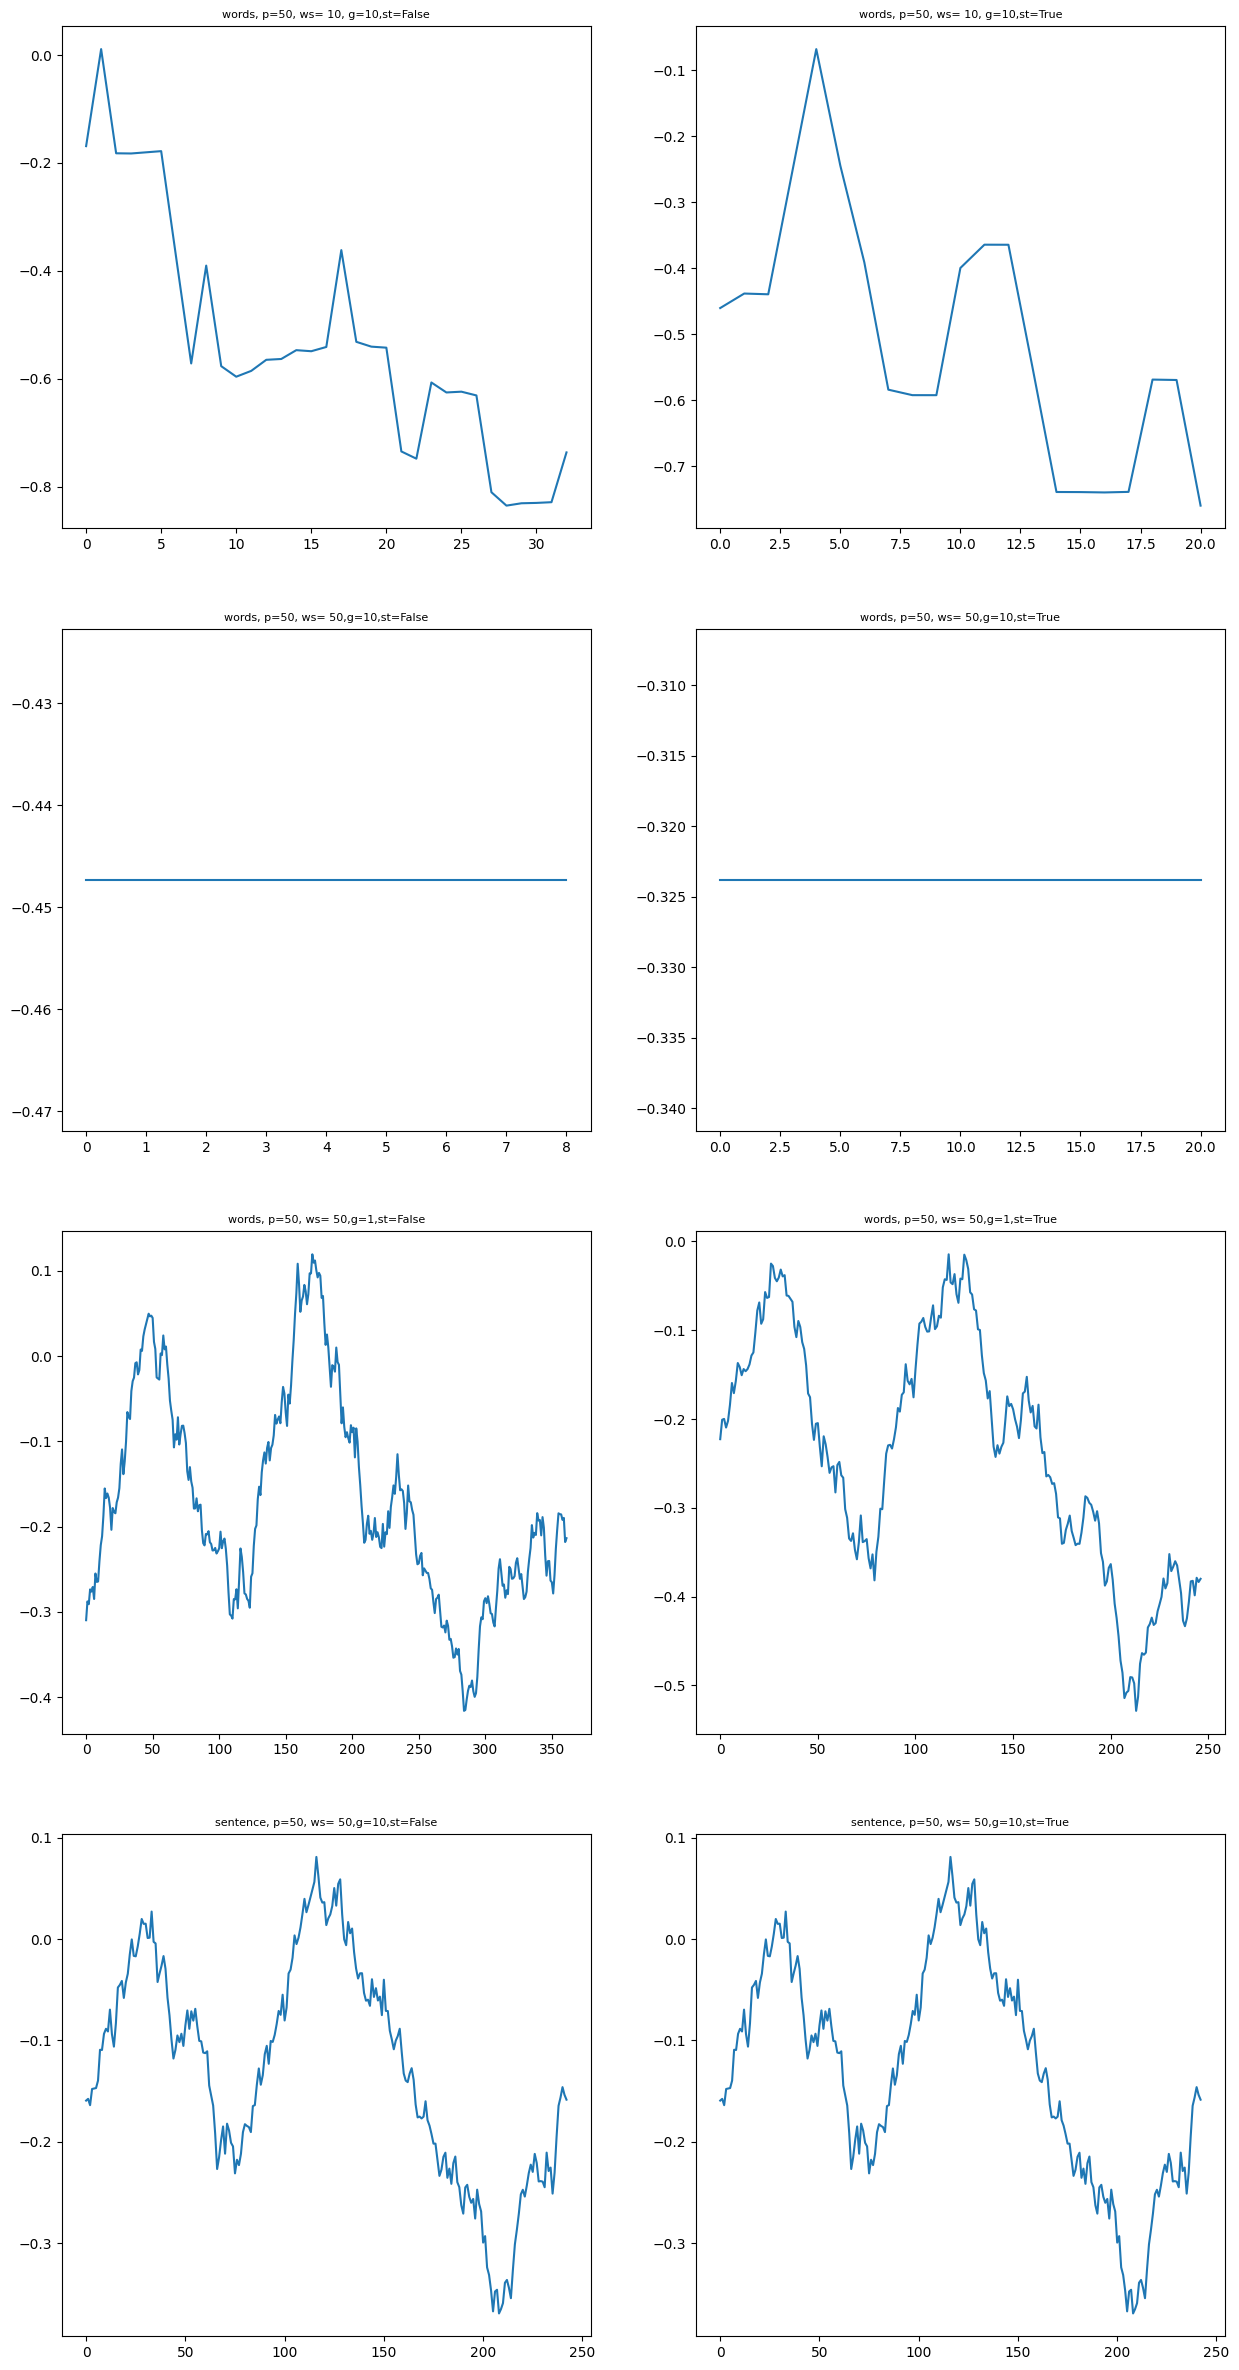

In [28]:
arc_grid_search('Scream 2_0120082.txt')